In [1]:
# Imports
import os
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# Read 'hourly' csv files
csv_files = os.listdir("data")
hourly_csv_files = [f for f in csv_files if '_1h.csv' in f]
hourlies = []
for i in range(len(hourly_csv_files)):
    hourlies.append(pd.read_csv('data/' + hourly_csv_files[i], header=1))

In [3]:
# Use the 'close' values and prepare the dict for the dataframe
time_window = 'train' # Can be train, test, both
# Train - test seperation made considering the date specifications from the slides
if time_window == 'train':
    closes = {}
    for i in range(len(hourlies)):
        temp = hourlies[i][hourlies[i]['date'] >= '2021-10-15 00:00:00']
        temp = temp[temp['date'] < '2021-12-01 00:00:00']
        closes[temp['symbol'].values[0]] = temp['close'].values
elif time_window == 'test':
    closes = {}
    for i in range(len(hourlies)):
        temp = hourlies[i][hourlies[i]['date'] >= '2021-12-01 00:00:00']
        temp = temp[temp['date'] < '2022-01-16 00:00:00']
        closes[temp['symbol'].values[0]] = temp['close'].values
elif time_window == 'both':
    closes = {}
    for i in range(len(hourlies)):
        temp = hourlies[i][hourlies[i]['date'] >= '2021-10-15 00:00:00']
        temp = temp[temp['date'] < '2022-01-16 00:00:00']
        closes[temp['symbol'].values[0]] = temp['close'].values
closes

{'TRX/USDT': array([0.09652, 0.09713, 0.09686, ..., 0.09757, 0.09601, 0.09599]),
 'ADA/USDT': array([1.554, 1.561, 1.565, ..., 2.178, 2.151, 2.152]),
 'ETH/USDT': array([4630.26, 4652.79, 4625.8 , ..., 3830.52, 3748.9 , 3766.  ]),
 'ZEC/USDT': array([220.2, 223.1, 221.6, ..., 121.9, 120. , 120.8]),
 'XLM/USDT': array([0.3358, 0.3392, 0.3386, ..., 0.3682, 0.3612, 0.3615]),
 'XMR/USDT': array([238. , 240.3, 238.9, ..., 267.7, 262.8, 263.3]),
 'BNB/USDT': array([622.5, 626.1, 620. , ..., 474.2, 463.5, 466.7]),
 'BTT/USDT': array([0.00316 , 0.003174, 0.003165, ..., 0.003751, 0.003686, 0.003692]),
 'LTC/USDT': array([207.8, 209.4, 209.1, ..., 183.6, 178. , 178.6]),
 'XRP/USDT': array([0.9983, 1.0047, 0.9995, ..., 1.1355, 1.1145, 1.1138]),
 'QTUM/USDT': array([16.068, 16.395, 16.703, ..., 13.233, 12.952, 12.877]),
 'DASH/USDT': array([180. , 181. , 179.8, ..., 187.8, 183.8, 184.3]),
 'LINK/USDT': array([25.31, 25.66, 25.68, ..., 26.74, 26.19, 26.28]),
 'EOS/USDT': array([4.004, 4.038, 4.016,

In [4]:
# Create the dataframe
df = pd.DataFrame(closes)
df = df.reindex(sorted(df.columns), axis=1)
df

,ADA/USDT,BNB/USDT,BTC/USDT,BTT/USDT,DASH/USDT,DOGE/USDT,EOS/USDT,ETC/USDT,ETH/USDT,LINK/USDT,LTC/USDT,NEO/USDT,QTUM/USDT,TRX/USDT,XLM/USDT,XMR/USDT,XRP/USDT,ZEC/USDT
0,1.554,622.5,56950.56,0.003160,180.0,0.2147,4.004,48.32,4630.26,25.31,207.8,37.50,16.068,0.09652,0.3358,238.0,0.9983,220.2
1,1.561,626.1,57267.91,0.003174,181.0,0.2164,4.038,48.79,4652.79,25.66,209.4,37.77,16.395,0.09713,0.3392,240.3,1.0047,223.1
2,1.565,620.0,57097.79,0.003165,179.8,0.2155,4.016,48.65,4625.80,25.68,209.1,37.70,16.703,0.09686,0.3386,238.9,0.9995,221.6
3,1.563,622.2,57400.41,0.003176,180.7,0.2157,4.036,48.50,4644.04,25.91,209.8,37.85,16.476,0.09731,0.3409,242.9,1.0041,224.1
4,1.572,623.3,57629.99,0.003174,181.6,0.2166,4.038,48.81,4663.23,25.99,211.2,38.05,16.507,0.09762,0.3420,245.4,1.0067,224.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,2.197,466.1,59597.64,0.003750,189.1,0.2324,4.691,55.86,3822.54,26.76,185.2,45.37,13.287,0.09771,0.3678,269.5,1.1358,122.9
1124,2.175,465.6,59431.71,0.003746,188.0,0.2334,4.647,55.63,3820.92,26.83,184.5,45.21,13.270,0.09772,0.3695,268.9,1.1356,122.3
1125,2.178,474.2,59086.91,0.003751,187.8,0.2335,4.638,54.89,3830.52,26.74,183.6,45.15,13.233,0.09757,0.3682,267.7,1.1355,121.9
1126,2.151,463.5,57258.62,0.003686,183.8,0.2292,4.543,53.50,3748.90,26.19,178.0,44.14,12.952,0.09601,0.3612,262.8,1.1145,120.0


In [5]:
# Normalize
version = 1

# Version-0: No normalization
# The first version I tried
if version == 0:
    df_normalized = df.copy() # Deep copy

# Version-1: Normalize by dividing each element of the array by the first element of the array
# The second version I tried after I realized I need to normalize
elif version == 1:
    df_normalized = df.copy()
    for c in df_normalized.columns.values:
        df_normalized[c] = df_normalized[c] / df_normalized[c][0]

# Version-2: Normalize by dividing each element of the array by its predecessor: (n)th element is divided by (n-1)th element for each (n)
# The other version I tried for normalization
elif version == 2:
    df_normalized = df.copy()
    for c in df_normalized.columns.values:
        new_col = np.zeros_like(df_normalized[c].values)
        new_col[0] = 1.0
        new_col[1:] = (df_normalized[c].values[1:] / df_normalized[c].values[:-1])
        df_normalized[c] = new_col

df_normalized

,ADA/USDT,BNB/USDT,BTC/USDT,BTT/USDT,DASH/USDT,DOGE/USDT,EOS/USDT,ETC/USDT,ETH/USDT,LINK/USDT,LTC/USDT,NEO/USDT,QTUM/USDT,TRX/USDT,XLM/USDT,XMR/USDT,XRP/USDT,ZEC/USDT
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004505,1.005783,1.005572,1.004430,1.005556,1.007918,1.008492,1.009727,1.004866,1.013829,1.007700,1.007200,1.020351,1.006320,1.010125,1.009664,1.006411,1.013170
2,1.007079,0.995984,1.002585,1.001582,0.998889,1.003726,1.002997,1.006829,0.999037,1.014619,1.006256,1.005333,1.039520,1.003523,1.008338,1.003782,1.001202,1.006358
3,1.005792,0.999518,1.007899,1.005063,1.003889,1.004658,1.007992,1.003725,1.002976,1.023706,1.009625,1.009333,1.025392,1.008185,1.015188,1.020588,1.005810,1.017711
4,1.011583,1.001285,1.011930,1.004430,1.008889,1.008850,1.008492,1.010141,1.007121,1.026867,1.016362,1.014667,1.027321,1.011397,1.018463,1.031092,1.008414,1.017711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1.413771,0.748755,1.046480,1.186709,1.050556,1.082441,1.171578,1.156043,0.825556,1.057290,0.891242,1.209867,0.826923,1.012329,1.095295,1.132353,1.137734,0.558129
1124,1.399614,0.747952,1.043567,1.185443,1.044444,1.087098,1.160589,1.151283,0.825206,1.060055,0.887873,1.205600,0.825865,1.012433,1.100357,1.129832,1.137534,0.555404
1125,1.401544,0.761767,1.037512,1.187025,1.043333,1.087564,1.158342,1.135969,0.827280,1.056499,0.883542,1.204000,0.823562,1.010879,1.096486,1.124790,1.137434,0.553588
1126,1.384170,0.744578,1.005409,1.166456,1.021111,1.067536,1.134615,1.107202,0.809652,1.034769,0.856593,1.177067,0.806074,0.994716,1.075640,1.104202,1.116398,0.544959


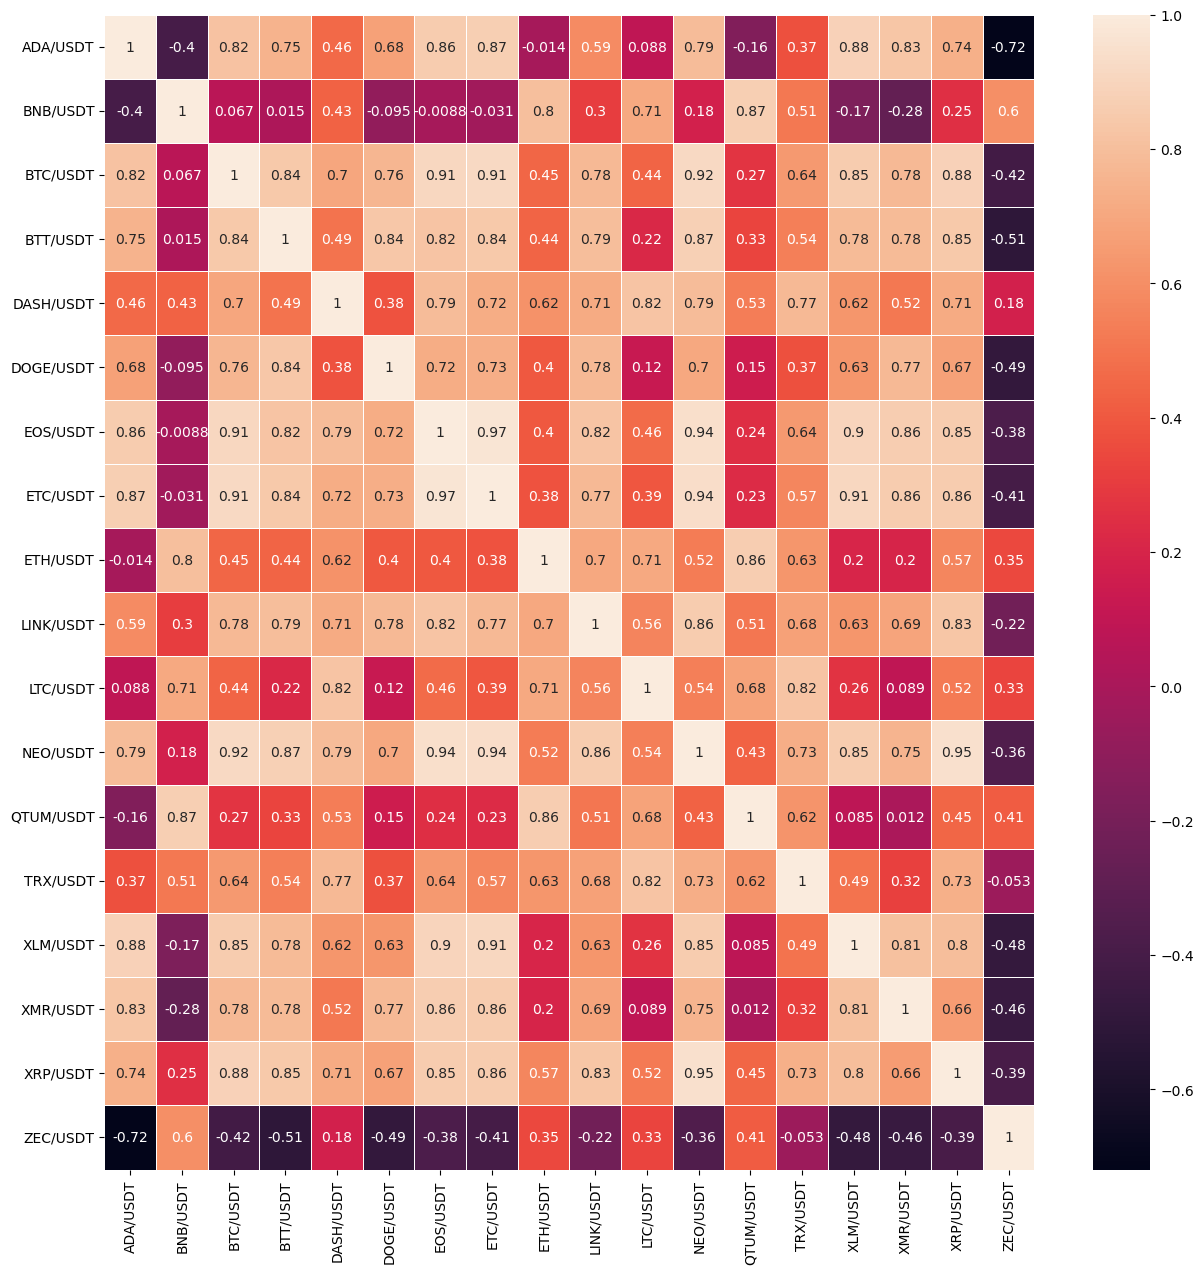

In [6]:
### KORELASYON
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sn.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

Spread Variance calculated after normalizing the data with normalization Version-1


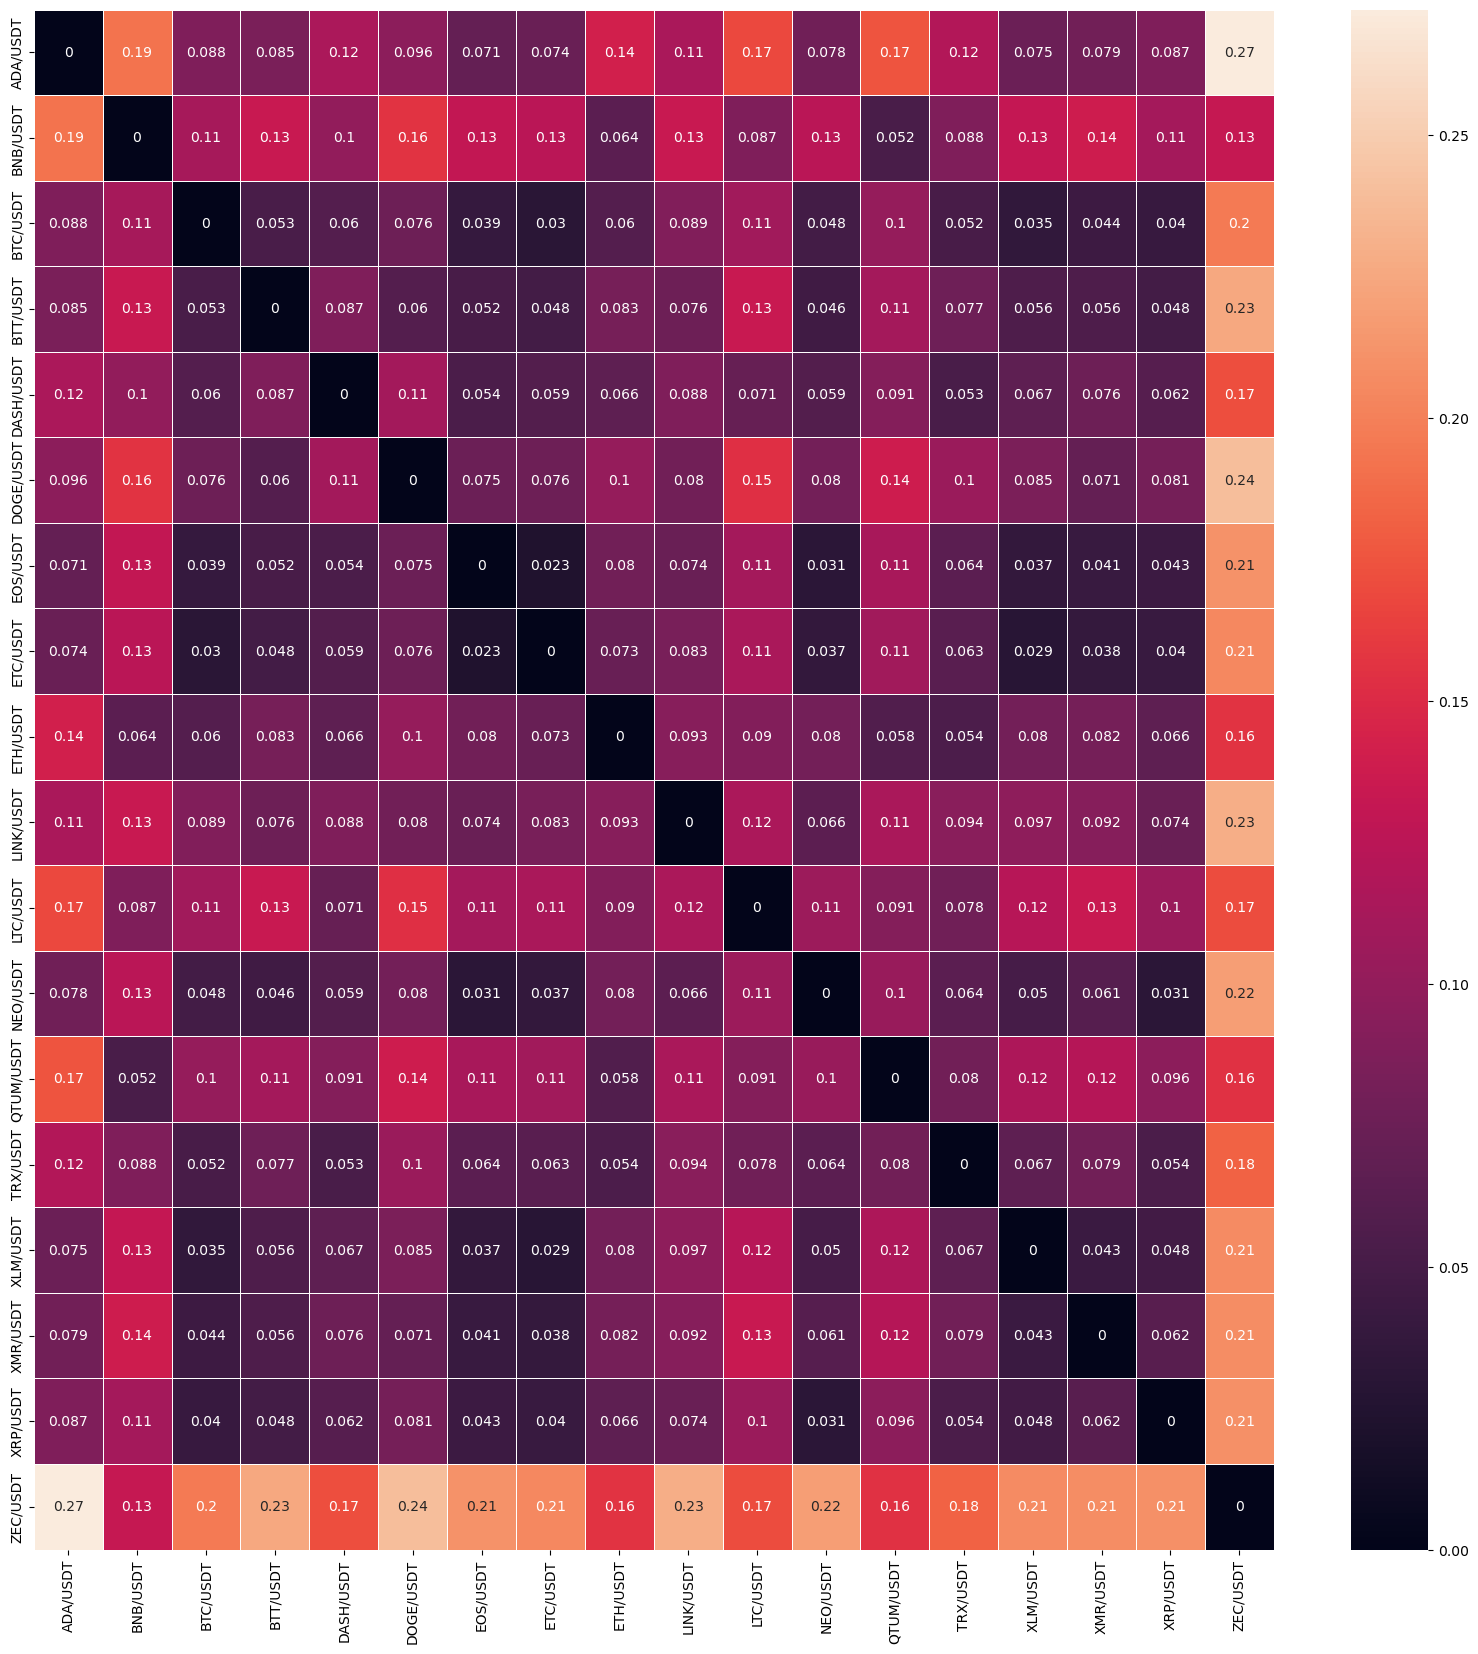

In [7]:
### SPREAD VARYANSI
print('Spread Variance calculated after normalizing the data with normalization Version-', version, sep='')
spread_var_matrix = pd.DataFrame().reindex_like(corr_matrix)
for i in df_normalized.columns.values:
    for j in df_normalized.columns.values:
        spread = df_normalized[i].values - df_normalized[j].values
        spread_var = np.std(spread)
        spread_var_matrix.loc[i][j] = spread_var
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(spread_var_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [8]:
### CROSSOVER SAYISI & SON CROSSOVER
print('Number of crossovers and the index of the last crossover is found by using the sign changes of the spreads calculated after normalizing the data with normalization Version-', version, sep='')
num_crossovers_matrix = pd.DataFrame().reindex_like(corr_matrix)
last_crossover_matrix = pd.DataFrame().reindex_like(corr_matrix)

for i in df_normalized.columns.values:
    for j in df_normalized.columns.values:
        spread = df_normalized[i].values - df_normalized[j].values
        cross = 0
        last_cross_index = 0

        # A sing change in the spread means a crossover happened.
        for k in range(1, spread.shape[0]):
            if spread[k-1]*spread[k] < 0: # Therefore, if spread[k-1] * spread[k] < 0 then a crossover happened.
                cross += 1
                last_cross_index = k
        
        num_crossovers_matrix.loc[i][j] = cross
        last_crossover_matrix.loc[i][j] = last_cross_index

Number of crossovers and the index of the last crossover is found by using the sign changes of the spreads calculated after normalizing the data with normalization Version-1


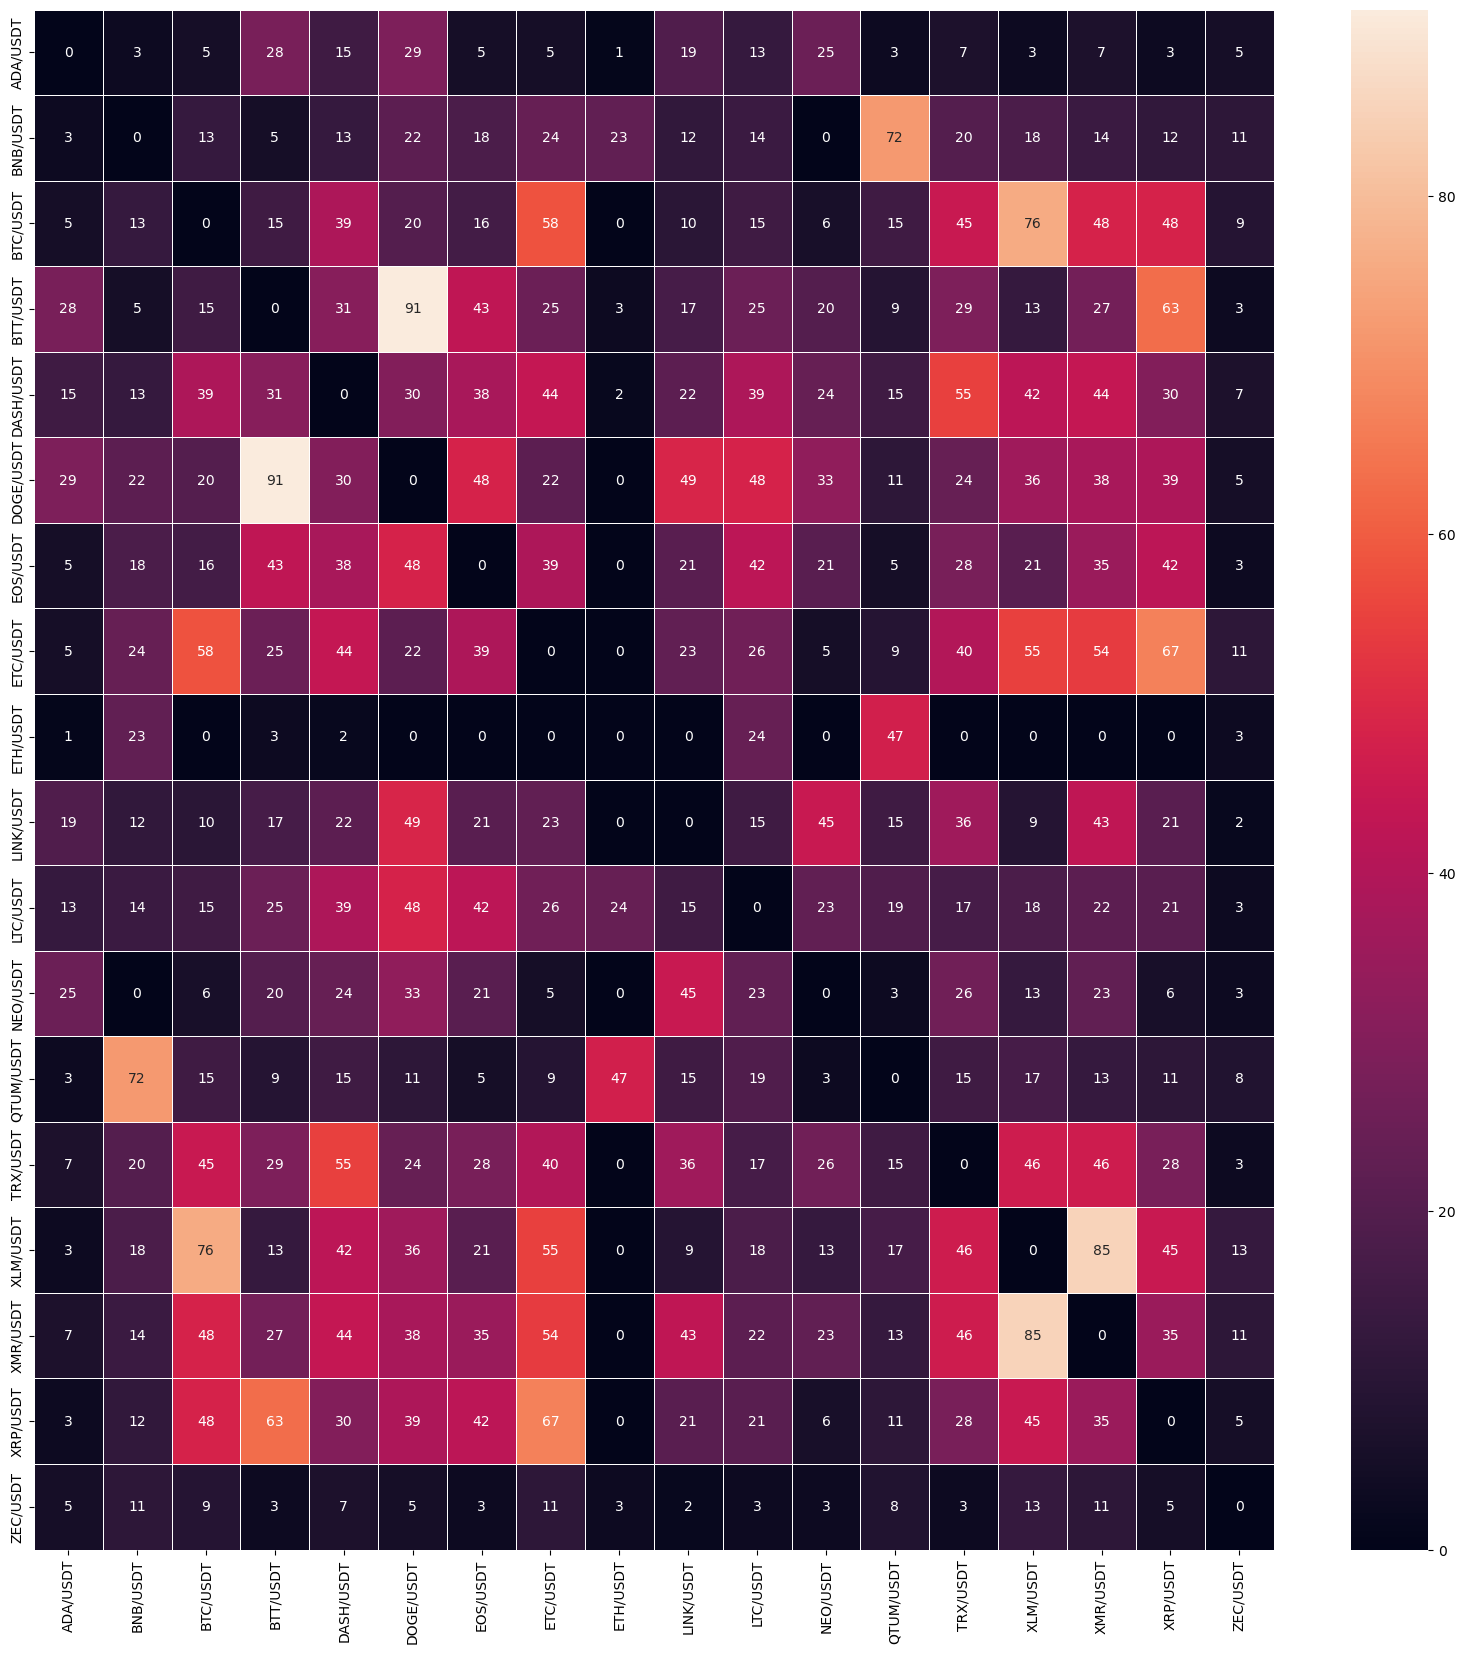

In [9]:
### CROSSOVER SAYISI
fig, ax = plt.subplots(figsize=(20,20)) 
sn.heatmap(num_crossovers_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

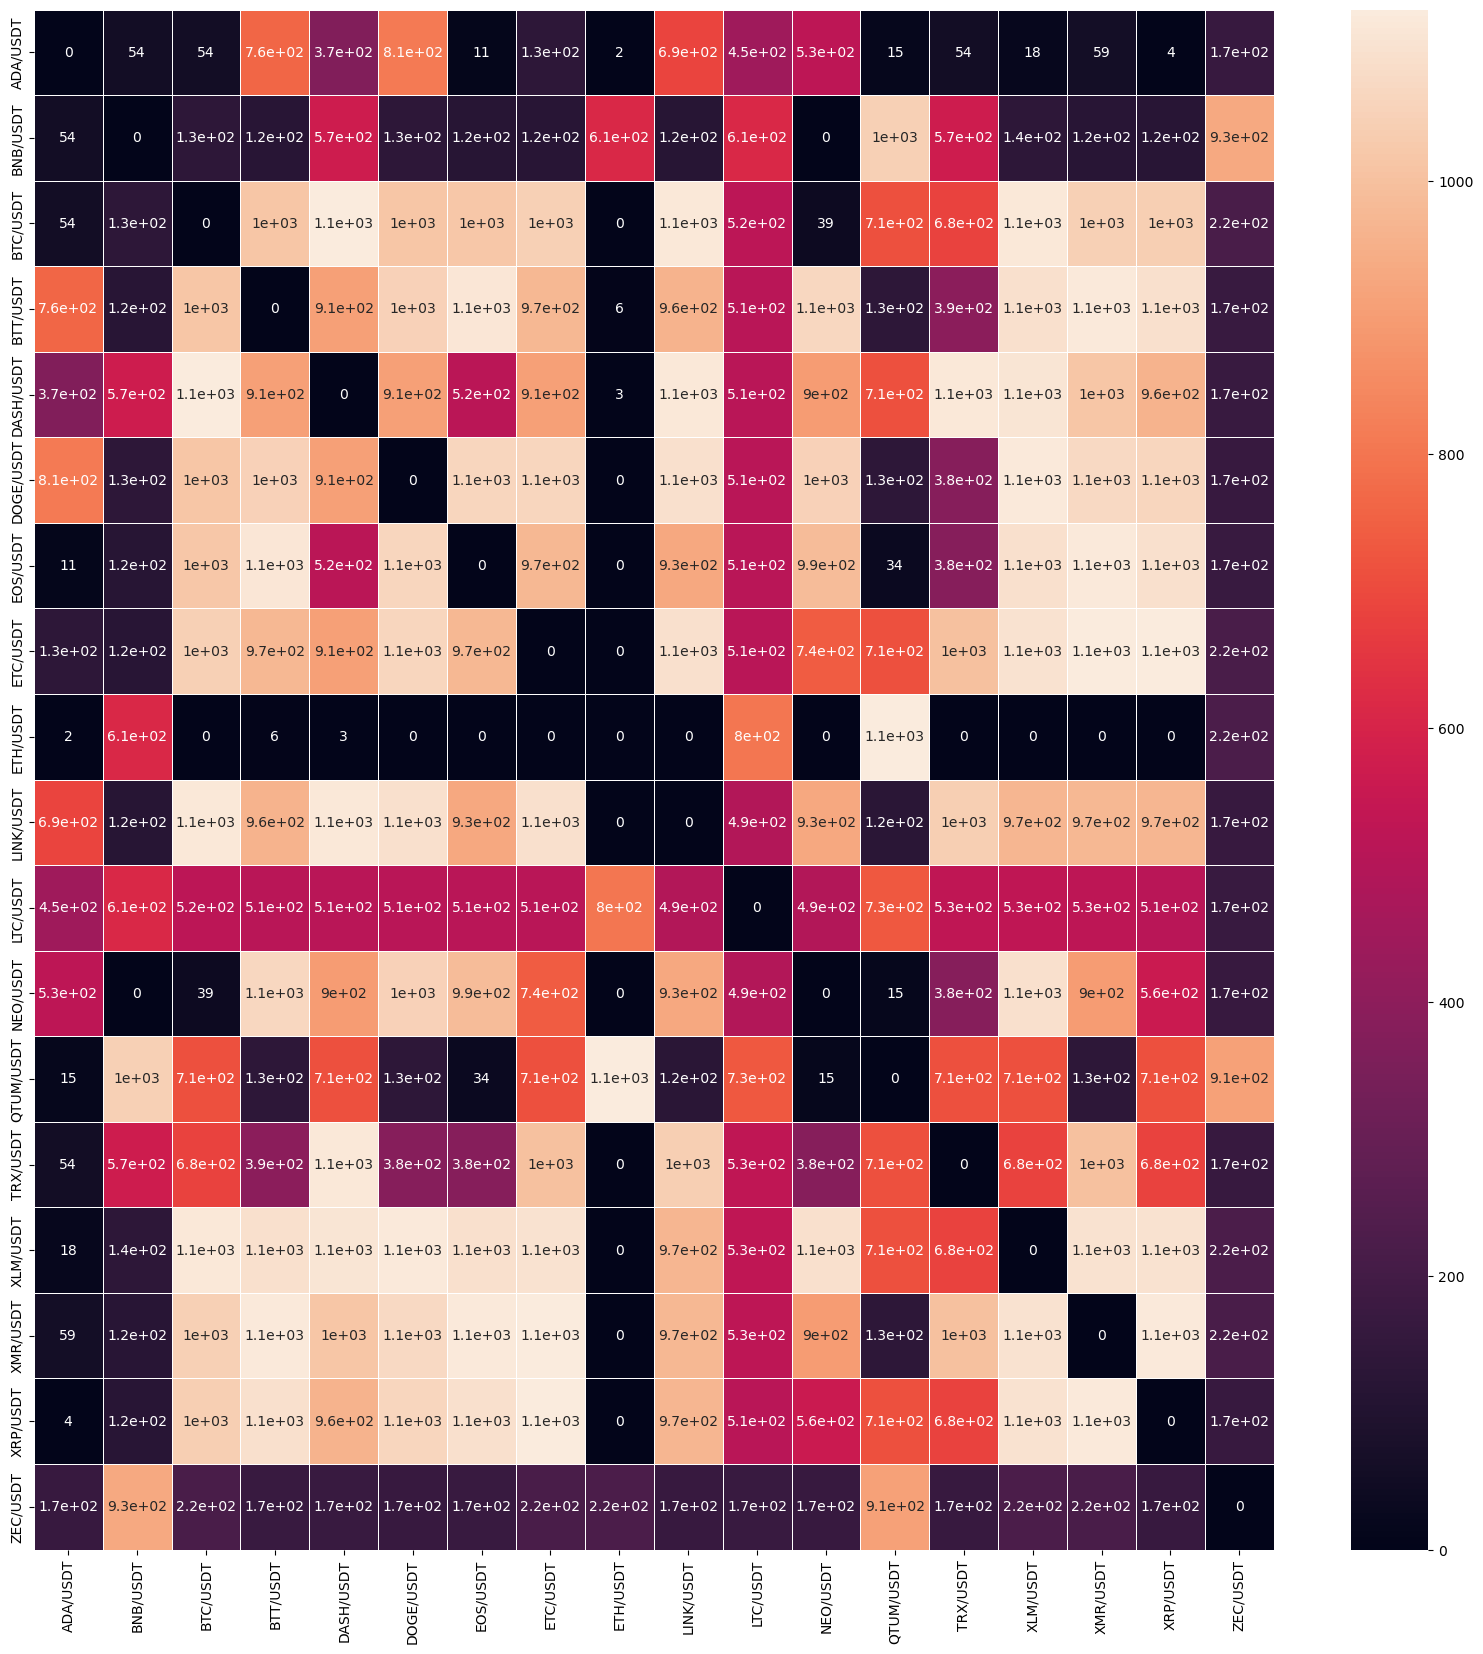

In [10]:
### SON CROSSOVER
fig, ax = plt.subplots(figsize=(20,20)) 
sn.heatmap(last_crossover_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

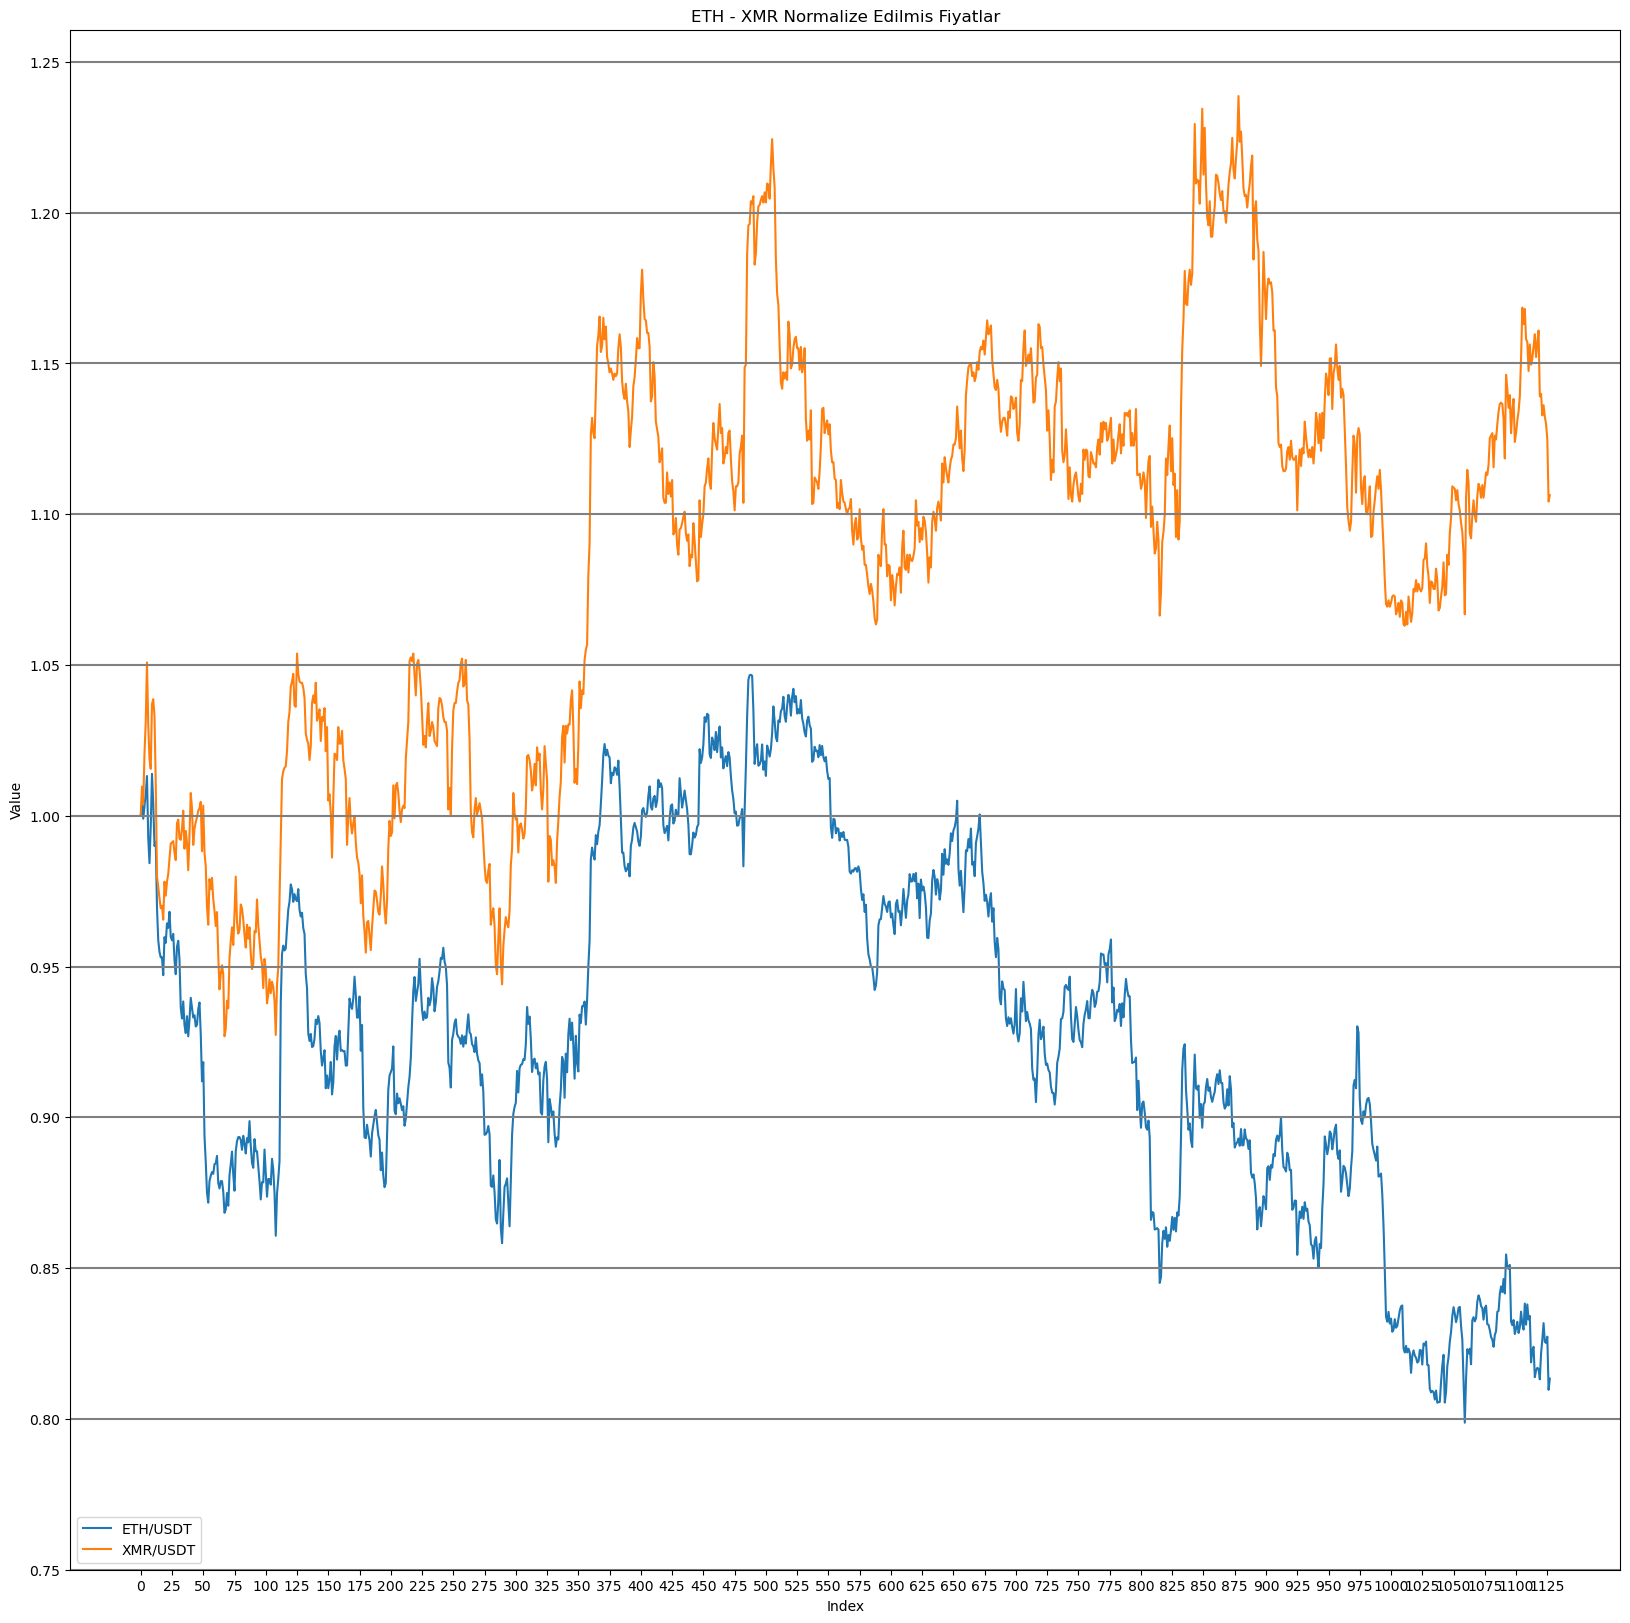

In [11]:
# Trying to plot the same plot on page 49 of the slides
coin_1 = 'ETH/USDT'
coin_2 = 'XMR/USDT'

x = np.arange(1128)
y1 = df_normalized[coin_1].to_numpy()
y2 = df_normalized[coin_2].to_numpy()

plt.figure(figsize=(20, 20))

plt.plot(x, y1, label=coin_1)
plt.plot(x, y2, label=coin_2)

plt.title('ETH - XMR Normalize Edilmis Fiyatlar')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.xticks(np.arange(1128, step=25))
plt.yticks(np.arange(0.75, 1.3, step=0.05))

for i in np.arange(0.75, 1.3, step=0.05):
    plt.axhline(y=i, color='gray', linestyle='-')

# Display the plot
plt.show()

Örneğin slaytlardaki 49. sayfada bulunan grafikte XMR en yüksek yaklaşık 1.05'e çıkarken, burada XMR en yüksek 1.20-1.25 bandına çıkıyor.

# ÇIKARIM

Ek olarak, şu anki güncel haliyle korelasyonun tam doğru çıkması (normalizasyondan bağımsız bir hesaplama); ancak spread varyansı, crossover sayısı, son crossover ve ETH-XMR grafiğinin yanlış çıkması (normalizasyona bağlı hesaplamalar) sebebiyle "normalizasyon" ile ilgili bir problemim olabileceğini düşünüyorum.

-

Güncel olarak notebook'ta kullanılan normalizasyon:

####### Normalize by dividing each element of the array by the first element of the array

    df_normalized = df.copy()
    for c in df_normalized.columns.values:
        df_normalized[c] = df_normalized[c] / df_normalized[c][0]